In [1]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold

2023-11-22 11:18:42.891468: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-22 11:18:42.929954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 11:18:43.518652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the data from the Excel file
df = pd.read_csv('question6a.csv')
#df2 = pd.read_csv('question6b.csv', header=None)
# Extract relevant columns
df = df[['event_narrative', 'event_type']]

# Drop rows with missing values(rows)
df = df.dropna()

Class=40, n=9196 (32.682%)
Class=19, n=1154 (4.101%)
Class=17, n=3392 (12.055%)
Class=10, n=219 (0.778%)
Class=27, n=254 (0.903%)
Class=45, n=1371 (4.872%)
Class=41, n=821 (2.918%)
Class=39, n=377 (1.340%)
Class=20, n=677 (2.406%)
Class=46, n=1586 (5.637%)
Class=13, n=1143 (4.062%)
Class=3, n=135 (0.480%)
Class=24, n=27 (0.096%)
Class=12, n=2425 (8.618%)
Class=22, n=1717 (6.102%)
Class=9, n=53 (0.188%)
Class=43, n=118 (0.419%)
Class=32, n=1371 (4.872%)
Class=25, n=44 (0.156%)
Class=6, n=247 (0.878%)
Class=44, n=119 (0.423%)
Class=2, n=225 (0.800%)
Class=15, n=370 (1.315%)
Class=16, n=146 (0.519%)
Class=35, n=47 (0.167%)
Class=1, n=22 (0.078%)
Class=30, n=22 (0.078%)
Class=21, n=69 (0.245%)
Class=11, n=134 (0.476%)
Class=5, n=29 (0.103%)
Class=0, n=15 (0.053%)
Class=28, n=4 (0.014%)
Class=18, n=59 (0.210%)
Class=7, n=262 (0.931%)
Class=4, n=51 (0.181%)
Class=29, n=10 (0.036%)
Class=8, n=10 (0.036%)
Class=42, n=175 (0.622%)
Class=38, n=15 (0.053%)
Class=14, n=2 (0.007%)
Class=31, n=7 (0.

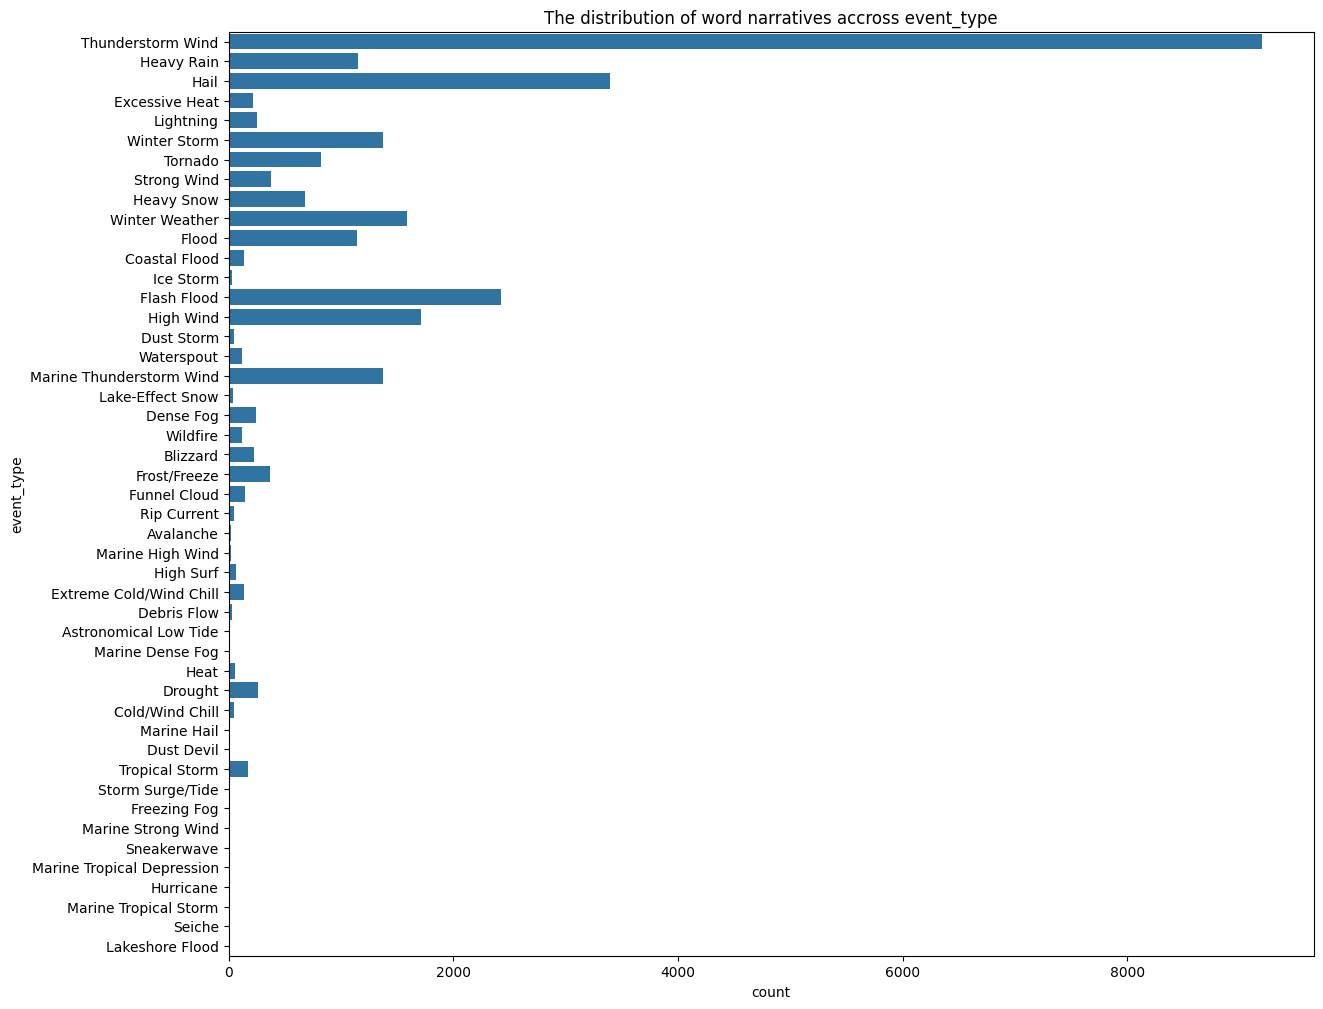

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sns.countplot(df.event_type)
plt.title('The distribution of word narratives accross event_type')

from sklearn.preprocessing import LabelEncoder

# Extract the target variable
y = df['event_type']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

# Add the encoded labels to the DataFrame
df['encoded_labels'] = encoded_labels
from collections import Counter
counter = Counter(df['encoded_labels'])
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=9, n=9196 (35.922%)
Class=4, n=1154 (4.508%)
Class=3, n=3392 (13.250%)
Class=11, n=1371 (5.355%)
Class=10, n=821 (3.207%)
Class=8, n=377 (1.473%)
Class=5, n=677 (2.645%)
Class=12, n=1586 (6.195%)
Class=1, n=1143 (4.465%)
Class=0, n=2425 (9.473%)
Class=6, n=1717 (6.707%)
Class=7, n=1371 (5.355%)
Class=2, n=370 (1.445%)


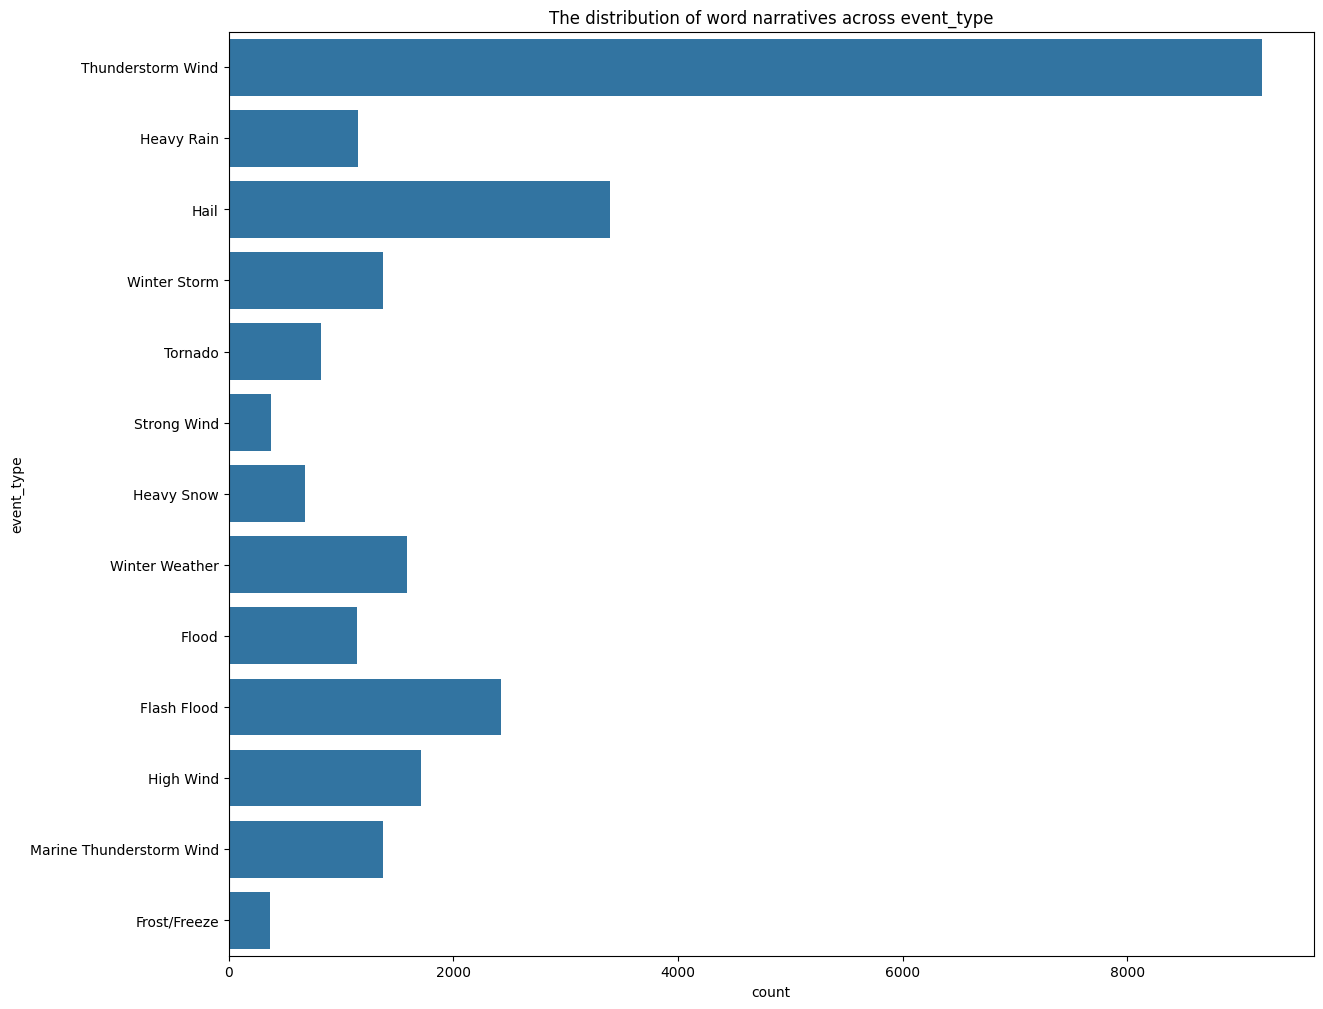

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your original DataFrame
# Filter classes with fewer than 100 samples
filtered_df = df.groupby('encoded_labels').filter(lambda x: len(x) >= 300)

# Plot the countplot with the filtered DataFrame
plt.figure(figsize=(14, 12))
sns.countplot(filtered_df['event_type'])
plt.title('The distribution of word narratives across event_type')

# Extract the target variable from the filtered DataFrame
y_filtered = filtered_df['event_type']

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels_filtered = label_encoder.fit_transform(y_filtered)

# Add the encoded labels to the filtered DataFrame
filtered_df['encoded_labels'] = encoded_labels_filtered

# Display the class distribution
counter_filtered = Counter(filtered_df['encoded_labels'])
for k, v in counter_filtered.items():
    per = v / len(y_filtered) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=9, n=2500 (9.766%)
Class=4, n=1154 (4.508%)
Class=13, n=7588 (29.641%)
Class=3, n=2500 (9.766%)
Class=11, n=1371 (5.355%)
Class=10, n=821 (3.207%)
Class=8, n=377 (1.473%)
Class=5, n=677 (2.645%)
Class=12, n=1586 (6.195%)
Class=1, n=1143 (4.465%)
Class=0, n=2425 (9.473%)
Class=6, n=1717 (6.707%)
Class=7, n=1371 (5.355%)
Class=2, n=370 (1.445%)


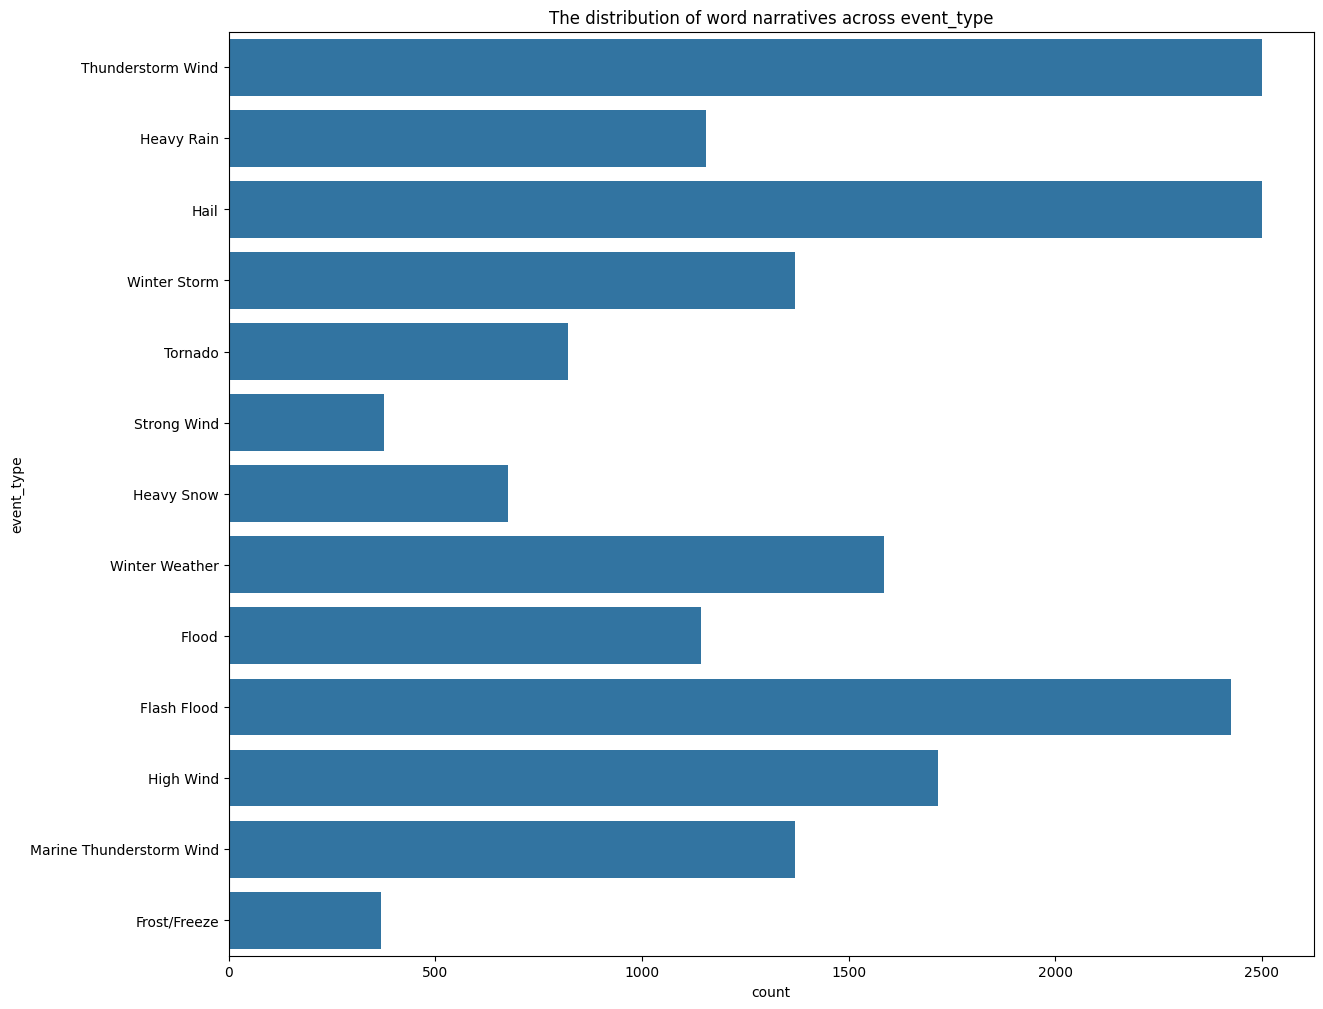

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Assuming filtered_df is your original filtered DataFrame with samples over 300
# Further limit the number of samples in Class 9 and Class 3 to 2500
filtered_df.loc[filtered_df['encoded_labels'] == 9, :] = filtered_df[filtered_df['encoded_labels'] == 9].sample(n=2500, random_state=42)
filtered_df.loc[filtered_df['encoded_labels'] == 3, :] = filtered_df[filtered_df['encoded_labels'] == 3].sample(n=2500, random_state=42)

# Plot the countplot with the modified DataFrame
plt.figure(figsize=(14, 12))
sns.countplot(filtered_df['event_type'])
plt.title('The distribution of word narratives across event_type')

# Extract the target variable from the modified DataFrame
y_filtered = filtered_df['event_type']

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels_filtered = label_encoder.fit_transform(y_filtered)

# Add the encoded labels to the modified DataFrame
filtered_df['encoded_labels'] = encoded_labels_filtered

# Display the class distribution
counter_filtered = Counter(filtered_df['encoded_labels'])
for k, v in counter_filtered.items():
    per = v / len(y_filtered) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

In [6]:
filtered_df = filtered_df.dropna()

In [7]:
filtered_df

,event_narrative,event_type,encoded_labels
0,Large tree down between Plantersville and Nett...,Thunderstorm Wind,9
1,One to two feet of deep standing water develop...,Heavy Rain,4
5,A few tree limbs greater than 6 inches down on...,Thunderstorm Wind,9
7,Quarter size hail near Rosemark.,Hail,3
11,Large tree down on powerlines in Caruthersville.,Thunderstorm Wind,9
...,...,...,...
36168,Farm Road 2 was flooded.,Flash Flood,0
36169,Two feet of water flooded Highway W west of Eu...,Flash Flood,0
36170,Two trees were knocked down in the Oakville di...,Thunderstorm Wind,9
36171,Trees were reported down on Long Pond Road in ...,Thunderstorm Wind,9


In [8]:
filtered_df['encoded_labels'].unique()

array([ 9,  4,  3, 11, 10,  8,  5, 12,  1,  0,  6,  7,  2])

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df_encoded is your DataFrame with the 'event_narrative' column
narratives = filtered_df['event_narrative'].values

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(narratives)

# Calculate total_words
total_words = len(tokenizer.word_index) + 1  # Adding 1 for the out-of-vocabulary token

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(narratives)

# Calculate max_sequence_length
max_sequence_length = max(len(seq) for seq in sequences)

# Example of how to pad sequences for model input
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

print("Total Words:", total_words)
print("Max Sequence Length:", max_sequence_length)

Total Words: 14828
Max Sequence Length: 859


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(filtered_df['event_narrative'], filtered_df['encoded_labels'], test_size=0.2, random_state=434)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
import numpy as np

# Download GloVe embeddings (you can adjust the embedding dimension and file path)
embedding_dim = 100
max_len = max_sequence_length
embedding_file_path = 'glove.6B.100d.txt'  # Replace with the actual path

# Load GloVe embeddings into a dictionary
embedding_index = {}
with open(embedding_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)
# Pad sequences
#max_len = max_sequence_length  # Set the maximum sequence length
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length , padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length , padding='post', truncating='post')

# Define the LSTM model with GloVe embeddings
model_undersampled = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, 
                              input_length=max_len, weights=[embedding_matrix], trainable=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(13, activation='softmax') 
])

# Print the model architecture
model_undersampled.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 859, 100)          1323700   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 13)                845       
                                                                 
Total params: 1366785 (5.21 MB)
Trainable params: 1366785 (5.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-11-22 11:19:12.358916: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
# Convert the labels to numpy array
y_train_np = np.array(y_train)

# Define the number of folds
num_folds = 5

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store training and validation accuracies for each fold
train_accuracies = []
val_accuracies = []



# Compile the model
model_undersampled.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_text_classifier_model_undersampled.h5', save_best_only=True)

# Iterate over folds
for train_index, val_index in kf.split(x_train_padded, y_train_np):
    x_train_fold, x_val_fold = x_train_padded[train_index], x_train_padded[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]
    model = model_undersampled    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold),
                        callbacks=[early_stopping,model_checkpoint])

    # Evaluate the model on the validation set and store accuracies
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print average training and validation accuracies
print(f'Average Training Accuracy: {np.mean(train_accuracies)}')
print(f'Average Validation Accuracy: {np.mean(val_accuracies)}')

Epoch 1/10
361/361 [==============================] - 176s 485ms/step - loss: 2.4346 - accuracy: 0.1341 - val_loss: 2.4233 - val_accuracy: 0.1381
Epoch 2/10


/dev1/genomeGPT/anaconda3/envs/optinum/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 164s 453ms/step - loss: 2.4257 - accuracy: 0.1400 - val_loss: 2.4230 - val_accuracy: 0.1395
Epoch 3/10
361/361 [==============================] - 164s 455ms/step - loss: 2.4246 - accuracy: 0.1390 - val_loss: 2.4229 - val_accuracy: 0.1367
Epoch 4/10
361/361 [==============================] - 165s 457ms/step - loss: 2.4240 - accuracy: 0.1375 - val_loss: 2.4244 - val_accuracy: 0.1395
Epoch 5/10
361/361 [==============================] - 171s 474ms/step - loss: 2.4240 - accuracy: 0.1339 - val_loss: 2.4228 - val_accuracy: 0.1381
Epoch 6/10
361/361 [==============================] - 171s 474ms/step - loss: 2.4238 - accuracy: 0.1382 - val_loss: 2.4228 - val_accuracy: 0.1381
Epoch 7/10
361/361 [==============================] - 170s 470ms/step - loss: 2.4244 - accuracy: 0.1367 - val_loss: 2.4218 - val_accuracy: 0.1367
Epoch 8/10
361/361 [==============================] - 171s 473ms/step - loss: 2.4232 - accuracy: 0.1398 - val_loss: 2.4222 - val_accura